In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [2]:
def plot_aprroximate(list_1 , list_2 , approx : int , title : str = None , xlabel : str = None , ylabel : str = None , saveas : str = None):
  """
  Smoothens the curve
  
  Args:
  list_1 : X axis
  list1_2 : Y axis
  approx : Value by how much the approximation has to be done
  title : Title of the resulting plot
  xlabel : x axis label
  ylabel : y axis label

  Returns:
  image of a Plot
  
  """
  
  list_x,list_y = list_1 , list_2
  plt.figure()
  poly = np.polyfit(list_x,list_y , approx)
  poly_y = np.poly1d(poly)(list_x)
  plt.plot(list_x,poly_y)
  if xlabel != None:
    plt.xlabel(xlabel)
  if ylabel != None:
    plt.ylabel(ylabel)
  
  plt.title(title)

  if saveas != None:
    plt.savefig(saveas)
  plt.show()

In [3]:
def string_to_float_list(string_data):
    # Remove square brackets and split the string by commas
    values_str = string_data.strip('[]')
    float_list = [float(val.strip()) for val in values_str.split(',')]

    return float_list

In [4]:
# prompt: stretch or shrink a list based on the length provided

def stretch_or_shrink(list1, length):
  """
  Stretches or shrinks a list to a given length by repeating or removing elements.

  Args:
    list1: The list to be stretched or shrunk.
    length: The desired length of the list.

  Returns:
    A stretched or shrunk list.
  """

  if length < len(list1):
    return list1[:length]
  elif length > len(list1):
    return list1 + [list1[-1]] * (length - len(list1))
  else:
    return list1


In [5]:
romantic_movies_intensities = pd.read_csv("/Users/mohamedmafaz/Desktop/Trailer Analysis/Intensities/romantic_movies100.csv")
romantic_movies_intensities_list = []
for rows in range(romantic_movies_intensities.shape[0]):
    string_list_of_intensities = romantic_movies_intensities.iloc[rows]["combined_array"]
    float_list_of_intensities = string_to_float_list(string_list_of_intensities)
    romantic_movies_intensities_list.append(float_list_of_intensities)

len(romantic_movies_intensities_list)

96

In [6]:
sum([len(i) for i in romantic_movies_intensities_list]) / len(romantic_movies_intensities_list)

3518.1875

In [7]:
# Aproimating it to 3500

def normalize(data):
    min_val = min(data)
    max_val = max(data)

    normalized = [(x - min_val) / (max_val - min_val) for x in data]
    return normalized

romantic_movies_intensities_list_normalized = []
for rows in range(romantic_movies_intensities.shape[0]):
    string_list_of_intensities = romantic_movies_intensities.iloc[rows]["combined_array"]
    float_list_of_intensities = string_to_float_list(string_list_of_intensities)

    if max(float_list_of_intensities) == 0.0:
        pass
    else:
        float_list_of_intensities_normalized = normalize(stretch_or_shrink(float_list_of_intensities , 3500)) # Normalizing it to [0-1] and streching or shrinking it to 3500 in lenght
        romantic_movies_intensities_list_normalized.append(float_list_of_intensities_normalized)

In [8]:
dropped = romantic_movies_intensities.shape[0] - len(romantic_movies_intensities_list_normalized) 
print(f"{dropped} record dropped due to them being completely blank")

0 record dropped due to them being completely blank


In [9]:
movie_name_list = list(romantic_movies_intensities["movie"])
movie_name_list

['Runaway Bride (1999) Trailer 1  Movieclips Classic Trailers.',
 'Good Luck Chuck (2007) Official Trailer - Dane Cook Jessica Alba Movie HD.',
 'Enchanted (2007) Trailer 1  Movieclips Classic Trailers.',
 'The Next Best Thing (2000) Trailer 1  Movieclips Classic Trailers.',
 'The Accidental Husband Trailer (HD - Best Quality).',
 'MAID IN MANHATTAN [2002] – Official Trailer (HD).',
 'Wimbledon (2004) Official Trailer - Kirsten Dunst Paul Bettany Movie HD.',
 'When a Man Loves a Woman (1994) - Trailer.',
 'SALSA - (1988) Trailer.',
 '13 Going on 30 (2004) Trailer 1  Movieclips Classic Trailers.',
 'Nights in Rodanthe (2008) Official Trailer - Diane Lane Movie.',
 'Dirty Dancing (1987) Official Trailer  - Patrick Swayze Jennifer Grey Movie HD.',
 'Chocolat (2000) Official Trailer 1 - Juliette Binoche Movie HD.',
 'Unfaithful - Official® Trailer [HD].',
 'Scent of a Woman Official Trailer 1 - Al Pacino Movie (1992) Movie HD.',
 'Sweet Home Alabama (2002) Trailer 1  Movieclips Classic Tra

In [10]:
avg_intensity = np.mean(np.array(romantic_movies_intensities_list_normalized) ,  axis=0)
avg_intensity = normalize(avg_intensity) # Normalizing the average
avg_intensity

[0.16571395661655627,
 0.3085419175093079,
 0.2909918521377786,
 0.4131109161613374,
 0.32464353855480627,
 0.2682563665133699,
 0.28738129753840974,
 0.25986081868446126,
 0.232331168187064,
 0.2253063134050763,
 0.23129432057519209,
 0.22941121919893429,
 0.22790489336747097,
 0.22173826852464087,
 0.230778013504726,
 0.30208402793941036,
 0.33763599792202487,
 0.3736422081877447,
 0.3744941474735018,
 0.37677456338992377,
 0.40135631885927486,
 0.41201249644702576,
 0.414855329520554,
 0.4269908079995438,
 0.6293809824619079,
 0.6313132635270055,
 0.6240285178107912,
 0.604990494087671,
 0.5864845027669847,
 0.5787465623366272,
 0.6629145343856505,
 0.653937214830711,
 0.6504011302650247,
 0.6578038522837907,
 0.6907888038438591,
 0.6948446770895225,
 0.7020853264248976,
 0.7075204623210675,
 0.724438290028821,
 0.8108621007210884,
 0.7331675604255165,
 0.7335805183165438,
 0.7253204396709564,
 0.700689723148443,
 0.6750040455280838,
 0.6392107133273437,
 0.6242866598160055,
 0.5979

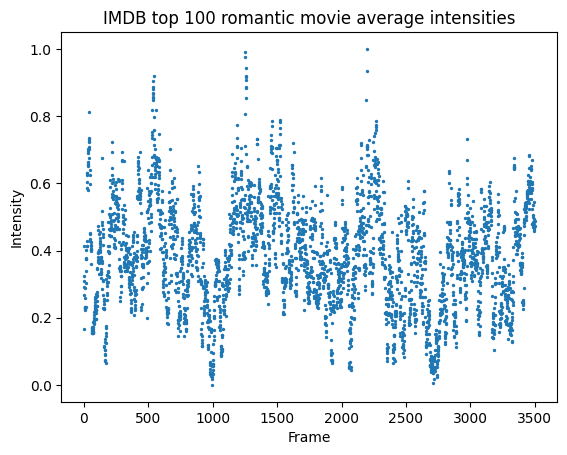

In [11]:
plt.scatter(range(3500) , avg_intensity , s = 2)
plt.title("IMDB top 100 romantic movie average intensities")
plt.xlabel("Frame")
plt.ylabel("Intensity")
plt.show()

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_5890/3925468303.py:12: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x_data, y_data, degree)


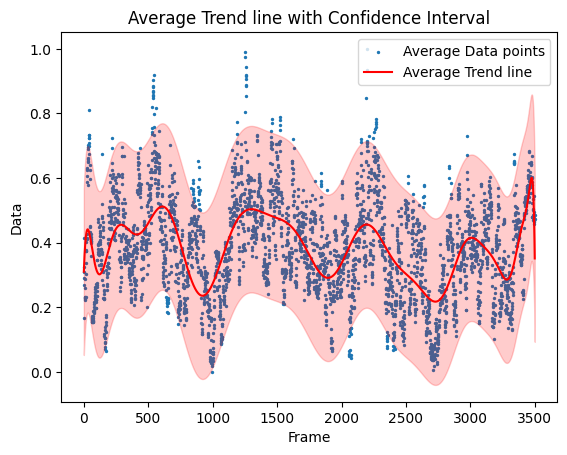

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have your data in the 'y_data' variable
y_data = avg_intensity

# Create an array for the x-values corresponding to the indices of the 'y_data'
x_data = np.arange(len(y_data))

# Perform linear regression using polyfit
degree = 40
coefficients = np.polyfit(x_data, y_data, degree)

# Create a function based on the coefficients to represent the regression line
poly_function = np.poly1d(coefficients)

# Generate y-values for the regression line
regression_line = poly_function(x_data)

# Calculate confidence interval (adjust the value as needed)
confidence = 1.645 * np.std(y_data)  # Assuming 95% confidence

# Plot the original data and the regression line with shaded area for uncertainty
plt.scatter(x_data, y_data, label='Average Data points', s=2)
plt.plot(x_data, regression_line, color='red', label='Average Trend line')

# Shaded area for confidence interval
plt.fill_between(x_data, regression_line - confidence, regression_line + confidence, color='red', alpha=0.2)

plt.xlabel('Frame')
plt.ylabel('Data')
plt.title('Average Trend line with Confidence Interval')
plt.legend()
plt.show()


In [13]:
from sklearn.metrics import r2_score
r2 = r2_score(avg_intensity, regression_line)
r2

0.2905709388038785

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_5890/3186615058.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


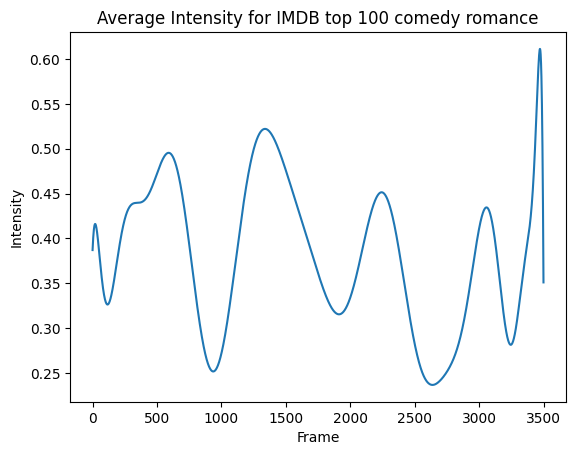

In [18]:
plot_aprroximate(range(3500) , avg_intensity , 30 , title = "Average Intensity for IMDB top 100 comedy romance" , 
                 xlabel="Frame" , ylabel="Intensity" , saveas = f'/Users/mohamedmafaz/Desktop/Trailer Analysis/Average pngs/Romance100.png')


In [ ]:
for movie_name , movie_intensity in zip(movie_name_list , romantic_movies_intensities_list_normalized):
    plot_aprroximate(range(3500) , movie_intensity , 30 , title = movie_name , 
                    xlabel="Frame" , ylabel="Intensity" , 
                    saveas = f'/Users/mohamedmafaz/Desktop/Trailer Analysis/Romance pngs/{movie_name} intensity.png')


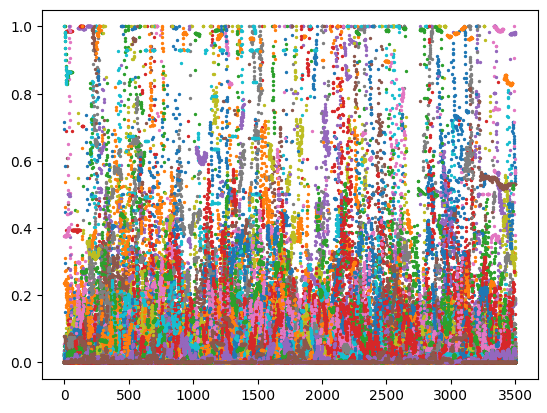

In [15]:
for i in romantic_movies_intensities_list_normalized:
    plt.scatter(range(3500) , i , s = 2)